In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os, shutil
from google.colab import drive
drive.mount('/content/drive/')

train = pd.read_csv('/content/drive/My Drive/titanic/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/titanic/titanic/test.csv')

Mounted at /content/drive/


### data exploration

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


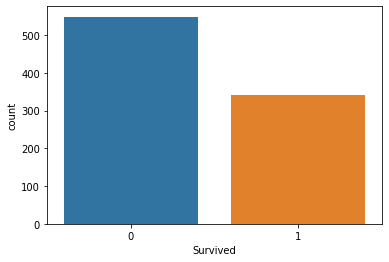

In [ ]:
sns.countplot(train['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


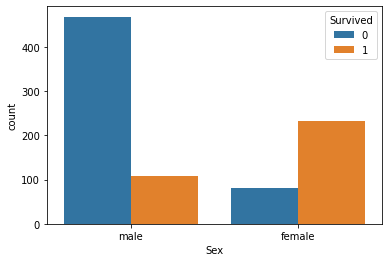

In [ ]:
sns.countplot(train['Sex'],hue=train['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


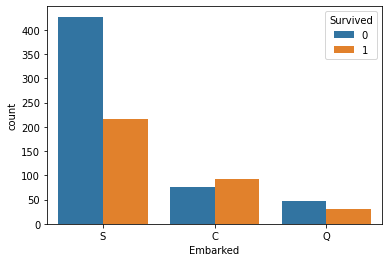

In [ ]:
sns.countplot( train['Embarked'] , hue=train['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


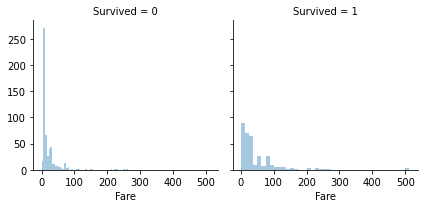

In [ ]:
g=sns.FacetGrid(train ,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

In [ ]:
#select variables 
train = train[['Survived','Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']]
train

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked
0,0,3,male,22.0,7.2500,1,0,S
1,1,1,female,38.0,71.2833,1,0,C
2,1,3,female,26.0,7.9250,0,0,S
3,1,1,female,35.0,53.1000,1,0,S
4,0,3,male,35.0,8.0500,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,0,S
887,1,1,female,19.0,30.0000,0,0,S
888,0,3,female,NaN,23.4500,1,2,S
889,1,1,male,26.0,30.0000,0,0,C


### Fill the missing values

In [ ]:
train.isnull().values.any()

True

In [ ]:
train.isnull()

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

#Filling missing values in "Age" column with median values according to gender.
male_age = train[train.Sex=='male']['Age']
male_age_median = train.groupby("Sex")['Age'].median().male
new_male_age = np.where(male_age.isnull(), male_age_median, male_age)
train.loc[train.Sex=='male','Age'] = new_male_age

female_age = train[train.Sex=='female']['Age']
female_age_median = train.groupby("Sex")['Age'].median().female
new_female_age = np.where(female_age.isnull(), female_age_median, female_age)
train.loc[train.Sex=='female','Age'] = new_female_age

train.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
#Changing categorical columns to numerical

le = LabelEncoder()
train['Sex'] = le.fit_transform(train.Sex)
train = pd.get_dummies(train)
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Survived,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0,0,0,1
1,1,1,0,38.0,71.2833,1,0,1,0,0
2,1,3,0,26.0,7.9250,0,0,0,0,1
3,1,1,0,35.0,53.1000,1,0,0,0,1
4,0,3,1,35.0,8.0500,0,0,0,0,1


In [ ]:
X = train.drop(['Survived'],axis=1)
y = train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data intSo training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print('Fold',cnt,'Train set',len(train_index),'Test set',len(test_index))
    cnt += 1

Fold 1 Train set 569 Test set 143
Fold 2 Train set 569 Test set 143
Fold 3 Train set 570 Test set 142
Fold 4 Train set 570 Test set 142
Fold 5 Train set 570 Test set 142


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

classifiers = []
classifiers.append(DecisionTreeClassifier())
classifiers.append(ensemble.RandomForestClassifier())

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, cv=kf ,scoring = 'accuracy',verbose=False))

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Decision Tree','Random Forest']})
cv_res

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.779454,0.023198,Decision Tree
1,0.787856,0.033115,Random Forest


In [ ]:
from sklearn import ensemble, metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#random forest
forest = ensemble.RandomForestClassifier(random_state=5)
forest_fit = forest.fit(X_train, y_train)

rf_predictions_train = forest_fit.predict(X_train)
rf_predictions_test = forest_fit.predict(X_test)

print('without tuning')
print('Random Forest train')
print(classification_report(y_train, rf_predictions_train))

print('Random Forest Test')
print(classification_report(y_test, rf_predictions_test))

without tuning
Random Forest train
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.98      0.95      0.97       268

    accuracy                           0.97       712
   macro avg       0.98      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712

Random Forest Test
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Random Forest Classifier Tuning
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [100,200,300,400,500],'random_state':[11] ,
         'max_depth':[2,4,6,8] ,'max_features': [2,4,6,7] } ]

forest_ = ensemble.RandomForestClassifier()
grid_search_RF = GridSearchCV(forest_,param_grid, cv=5,scoring='accuracy')
grid_search_RF.fit(X_train, y_train)

best_RF_estimator = grid_search_RF.best_estimator_
print(best_RF_estimator)

RandomForestClassifier(max_depth=6, max_features=6, n_estimators=400,
                       random_state=11)


In [ ]:
forest = ensemble.RandomForestClassifier(n_estimators =400, random_state=100,max_depth=6,max_features=6,criterion='entropy')
forest_fit = forest.fit(X_train, y_train)

rf_predictions_train = forest_fit.predict(X_train)
rf_predictions_test = forest_fit.predict(X_test)
print('after tune it')
print('Random Forest train')
print(classification_report(y_train, rf_predictions_train))

print('Random Forest Test')
print(classification_report(y_test, rf_predictions_test))

after tune it
Random Forest train
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       444
           1       0.93      0.71      0.81       268

    accuracy                           0.87       712
   macro avg       0.89      0.84      0.86       712
weighted avg       0.88      0.87      0.87       712

Random Forest Test
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test = test[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']]

In [ ]:
test_male_age = test[test.Sex=='male']['Age']
test_male_age_median = test.groupby("Sex")['Age'].median().male
test_new_male_age = np.where(test_male_age.isnull(), test_male_age_median, test_male_age)
test.loc[test.Sex=='male','Age'] = test_new_male_age

test_female_age = test[test.Sex=='female']['Age']
test_female_age_median = test.groupby("Sex")['Age'].median().female
test_new_female_age = np.where(test_female_age.isnull(), test_female_age_median, test_female_age)
test.loc[test.Sex=='female','Age'] = test_new_female_age

test_male_Fare = test[test.Sex=='male']['Fare']
test_male_Fare_median = test.groupby("Sex")['Fare'].median().male
test_new_male_fare = np.where(test_male_Fare.isnull(), test_male_Fare_median, test_male_Fare)
test.loc[test.Sex=='male','Fare'] = test_new_male_fare

test_female_Fare = test[test.Sex=='female']['Fare']
test_female_Fare_median = test.groupby("Sex")['Fare'].median().female
test_new_female_fare = np.where(test_female_Fare.isnull(), test_female_Fare_median, test_female_Fare)
test.loc[test.Sex=='female','Fare'] = test_new_female_fare

test.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Pclass      0
Sex         0
Age         0
Fare        0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
le = LabelEncoder()
test['Sex'] = le.fit_transform(test.Sex)
test = pd.get_dummies(test)
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Sex,Age,Fare,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,7.8292,0,0,0,1,0
1,3,0,47.0,7.0000,1,0,0,0,1
2,2,1,62.0,9.6875,0,0,0,1,0
3,3,1,27.0,8.6625,0,0,0,0,1
4,3,0,22.0,12.2875,1,1,0,0,1


In [ ]:
#rf
submission = pd.read_csv('/content/drive/My Drive/titanic/titanic/gender_submission.csv')
predictions_test = forest_fit.predict(test)
submission['Survived'] = predictions_test

submission.to_csv('/content/drive/My Drive/submission_rf2.csv')